# Complex analysis example

Analyze a complex of two strands intended to form a bipedal walker with a duplex torso and single-stranded legs (Shin and Pierce, J Am Chem Soc, 2004).

Material: DNA    
Temperature: 23 C

Calculate the partition function, equilibrium pair probability matrix, MFE proxy structure(s), and a set of suboptimal structures within a specified free energy gap.

These calculations can alternatively be performed using Utilities commands (see the Utilities example notebook). 

In [1]:
# Import NUPACK Python module
from nupack import *

In [5]:
# Define physical model 
my_model = Model(material='dna', celsius=23)

# Define strands
a = Strand('GGCTGGTTTCTGCTCTCTAGTTCGCGAGGTGCAATCTCCTATC', name='a')
b = Strand('GTCTGGGATGCTGGATACTGAACCTAGAGAGCAGAAACCAGCC', name='b')

# Define the complex of interest 
walker = Complex([a, b])

# Define the complex set to contain only one complex
my_set = ComplexSet(strands={a: 1e-8, b: 1e-8}, complexes=SetSpec(max_size=0, include=[walker]))

# Define the energy gap (kcal/mol) for calculating suboptimal structures
gap = 1.1 

# Analyze the complex 
# Calculate pfunc, pairs, mfe, subopt
my_result = complex_analysis(my_set, compute=['pfunc', 'pairs', 'mfe', 'subopt'], 
                             options={'energy_gap': gap}, model=my_model)
my_result

Complex,Pfunc,ΔG (kcal/mol),MFE (kcal/mol)
(a+b),4.1688e+30,-41.492,-38.547


In [7]:
# MFE proxy structure(s)
walker_result = my_result[walker] # result object for complex 'x'
print('\nMFE proxy structure(s) for walker (a+b):')
for i, s in enumerate(walker_result.mfe):
    print('    %2d: %s (%.2f kcal/mol)' % (i, s.structure, s.energy))

print('\nSuboptimal proxy structures for walker (a+b):')
for i, s in enumerate(walker_result.subopt):
    print('    %2d: %s (%.2f kcal/mol)' % (i, s.structure, s.energy))


MFE proxy structure(s) for walker (a+b):
     0: ((((((((((((((((((((((.((.....)))).........+..........(.(....).)...)))))))))))))))))))) (-38.55 kcal/mol)

Suboptimal proxy structures for walker (a+b):
     0: ((((((((((((((((((((((.((.....)))).........+..........(.(....).)...)))))))))))))))))))) (-38.55 kcal/mol)
     1: ((((((((((((((((((((......(((.(....).)))...+..........(.(....).)...)))))))))))))))))))) (-39.26 kcal/mol)
     2: ((((((((((((((((((((...((.....))...........+..........(.(....).)...)))))))))))))))))))) (-39.09 kcal/mol)
     3: ((((((((((((((((((((((.((.....))))..(((....+.....)))(.(.(....).).).)))))))))))))))))))) (-38.45 kcal/mol)
     4: ((((((((((((((((((((......(((........)))...+..........(.(....).)...)))))))))))))))))))) (-38.81 kcal/mol)
     5: ((((((((((((((((((((((....(((.(....).)))...+..........(.(....).)))).))))))))))))))))))) (-37.98 kcal/mol)
     6: ((((((((((((((((((((((....(((.(....).)))...+..........(.(....).))).)))))))))))))))))))) (-37.98 kcal/mol)

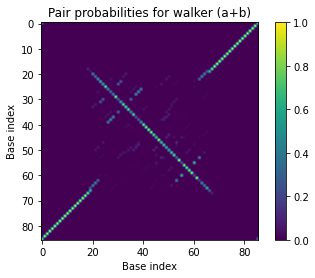

In [8]:
# Plot equilibrium pair probability matrix
import matplotlib.pyplot as plt
plt.imshow(walker_result.pairs.to_array())
plt.xlabel('Base index')
plt.ylabel('Base index')
plt.title('Pair probabilities for walker (a+b)')
plt.colorbar()
plt.clim(0, 1)